In [1]:
import ROOT
from ROOT import RooFit as RF
import root_numpy as rnp
from root_pandas import read_root

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt     
import graphviz

from IPython.display import Image        ## plot png/jpeg with:  Image(filename=('./temp/my_plot.png'))
# from wand.image import Image as WImage   ## plot pdf with:       WImage(filename='hat.pdf[1]')   [1] - page number
%pylab inline       

Welcome to JupyROOT 6.14/04
Populating the interactive namespace from numpy and matplotlib


In [2]:
variables = ( [

'nB', 'nB_id', 'SAMEEVENT',
    
"K1_pt", "K1_eta", 
"K2_pt", "K2_eta",
    
"pipi_pt", "KK_pt", "pi1K1_pt", "pi1K2_pt", "pi2K1_pt", "pi2K2_pt",
    
"PI1_pt", "PI1_eta",
"PI2_pt", "PI2_eta",
    
'mu_1_pt',  'mu_1_eta',
'mu_2_pt',  'mu_2_eta', 

'JP_pt', 'JP_eta',
'phi_pt', 'phi_eta',
# 'psi_pt',   'psi_eta',
    
###  
"PIPI_mass_Cjp", "PHI_mass_Cjp", "BU_mass_Cjp", "JPSI_mass_Cmumu", 
    
### 
"JPSI_vtxprob_Cmumu", "JPSI_pvcos2_Cmumu", "JPSI_pvdistsignif2_Cmumu",
    
###    
"BU_pt_Cjp", 'BU_eta_Cjp',
    
###   
"BU_pvdistsignif2_Cjp", "BU_pvdistsignif2_Cjp_Martino", "BU_pvdistsignif2_Cjp_mine", "BU_pvdistsignif3_Cjp", 
"BU_pvcos2_Cjp", "BU_vtxprob_Cjp",
    
###
"PV_bestBang_RF_CL"
    
] ) 

psi_vars = ['psi_mass_Cjp', 'psi_pt', 'psi_eta']
X_vars = ['X_mass_Cjp', 'X_pt', 'X_eta']
MC_vars = ["dR_mu1", "dR_mu2", "dR_pi1", "dR_pi2", "dR_K1", "dR_K2",
           "dR_mu1_vv", "dR_mu2_vv", "dR_pi1_vv", "dR_pi2_vv", "dR_K1_vv", "dR_K2_vv",
           'gen_phi_mass', 'delta_phi_mass',
           "BU_reflmass1_Cjp", "BU_reflmass2_Cjp"] 

# MC = read_root('BsToPsiPhi_Smatch_v1_pair_dR_psi_renamed.root', columns = variables + MC_vars + psi_vars) # psi
# data = read_root('../../Bs_resonances/new_2_with_more_B0_e3de87.root', columns = variables + X_vars)
data = read_root('/home/yaourt/new_2_with_more_B0_nB_4000_DS_and_pt_v2_791587.root', columns = variables + X_vars)
data = data.dropna()

In [3]:
X_mask   = (data.X_mass_Cjp > 3.67)   & (data.X_mass_Cjp < 3.7)
phi_mask = (data.PHI_mass_Cjp > 1.01) & (data.PHI_mass_Cjp < 1.03) 
B_mask   = (data.BU_mass_Cjp > 5.34)  & (data.BU_mass_Cjp < 5.4)
mpipi_mask = (data.PIPI_mass_Cjp > 0.4) & (data.PIPI_mass_Cjp < 0.6)
current_BsDS_mask  = data.BU_pvdistsignif2_Cjp > 5
current_jpsiDS_mask = data.JPSI_pvdistsignif2_Cmumu > 3

data_sig_window = data[X_mask & phi_mask & B_mask]
data_sig_pipi_window = data[X_mask & phi_mask & B_mask & mpipi_mask]
data_sig_wo_psi_window = data[phi_mask & B_mask]
data_sig_wo_psi_pipi_window = data[phi_mask & B_mask & mpipi_mask]

data_sig_current_DS = data[X_mask & phi_mask & B_mask & mpipi_mask & current_BsDS_mask & current_jpsiDS_mask]

In [4]:
data.columns

Index(['mu_2_pt', 'BU_pt_Cjp', 'X_pt', 'PIPI_mass_Cjp', 'pi1K1_pt', 'X_eta',
       'PI2_eta', 'JP_pt', 'PI1_pt', 'mu_2_eta', 'phi_eta', 'pi2K2_pt',
       'BU_vtxprob_Cjp', 'K2_eta', 'KK_pt', 'K1_eta', 'BU_pvdistsignif2_Cjp',
       'pi1K2_pt', 'JPSI_pvcos2_Cmumu', 'BU_pvdistsignif3_Cjp', 'SAMEEVENT',
       'nB', 'BU_eta_Cjp', 'BU_pvdistsignif2_Cjp_Martino', 'X_mass_Cjp',
       'PHI_mass_Cjp', 'JPSI_mass_Cmumu', 'JPSI_pvdistsignif2_Cmumu',
       'mu_1_pt', 'nB_id', 'PI2_pt', 'JP_eta', 'mu_1_eta',
       'BU_pvdistsignif2_Cjp_mine', 'K1_pt', 'PV_bestBang_RF_CL', 'PI1_eta',
       'phi_pt', 'pi2K1_pt', 'pipi_pt', 'BU_pvcos2_Cjp', 'JPSI_vtxprob_Cmumu',
       'K2_pt', 'BU_mass_Cjp'],
      dtype='object')

In [5]:
data.head()

,mu_2_pt,BU_pt_Cjp,X_pt,PIPI_mass_Cjp,pi1K1_pt,X_eta,PI2_eta,JP_pt,PI1_pt,mu_2_eta,...,K1_pt,PV_bestBang_RF_CL,PI1_eta,phi_pt,pi2K1_pt,pipi_pt,BU_pvcos2_Cjp,JPSI_vtxprob_Cmumu,K2_pt,BU_mass_Cjp
0,6.079861,16.839408,15.220870,0.816658,2.697303,-0.498242,-0.318851,12.855789,1.920597,-0.259383,...,0.832825,0.999997,-0.378099,1.622729,1.420084,2.405431,0.999371,0.500193,0.792328,5.374444
1,15.648944,34.306646,31.028665,0.459651,8.937843,-0.269583,-0.257914,20.152593,7.088191,-0.279723,...,1.850064,0.527403,-0.268528,3.278809,5.663979,10.901585,0.999988,0.614785,1.425886,5.445889
2,7.622695,27.948860,20.594132,0.449944,9.349053,0.921641,0.726417,14.728140,4.841542,0.750872,...,4.537366,0.861919,0.835529,7.365029,5.622795,5.934651,0.999817,0.104749,2.823766,5.506572
3,7.622695,25.793126,18.434179,0.735202,7.326249,0.970037,0.879466,14.747077,2.791276,0.750872,...,4.537366,0.740230,1.029989,7.365385,5.423300,3.698396,0.999998,0.104749,2.823766,5.182262
4,7.622695,24.085764,16.728699,0.436816,5.622795,0.945089,0.879466,14.746788,1.093392,0.750872,...,4.537366,0.824596,0.726417,7.364809,5.423300,2.027498,0.999994,0.104749,2.823766,5.195252


In [6]:
# data = data.rename(index=str, columns={"X_mass_Cjp": "psi_mass_Cjp", "X_pt": "psi_pt", "X_eta": "psi_eta"})

### **$\text{p}_\text{T}$ studies**

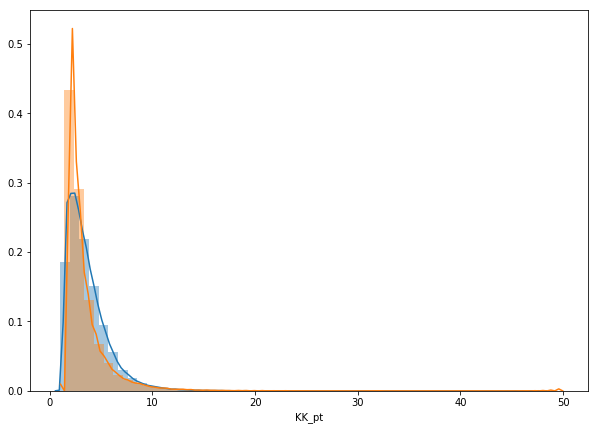

In [8]:
fig = plt.figure(figsize=(10,7))
sns.distplot(data.pipi_pt)
sns.distplot(data.KK_pt)
plt.show()

In [9]:
sum(data_sig_window.pipi_pt > data_sig_window.KK_pt)

476

In [13]:
sum(data_sig_window.pipi_pt < data_sig_window.KK_pt)

649

In [55]:
sum(data.PIPI_mass_Cjp < data.PHI_mass_Cjp)

203889

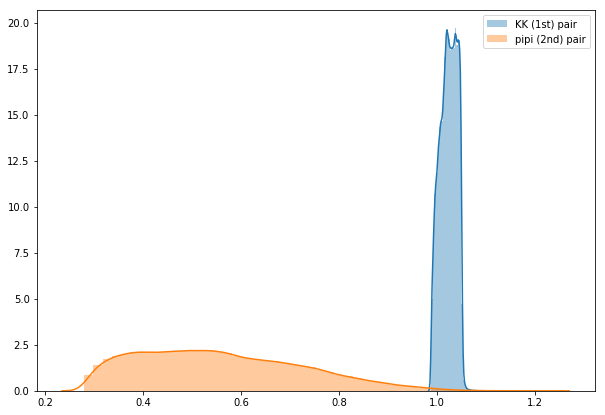

In [11]:
fig = plt.figure(figsize=(10,7))

sns.distplot(data.PHI_mass_Cjp, label='KK (1st) pair')
sns.distplot(data.PIPI_mass_Cjp, label='pipi (2nd) pair')

plt.legend()
plt.xlabel('')
plt.show()
fig.savefig('pair_mass.png')

### **DS studies**

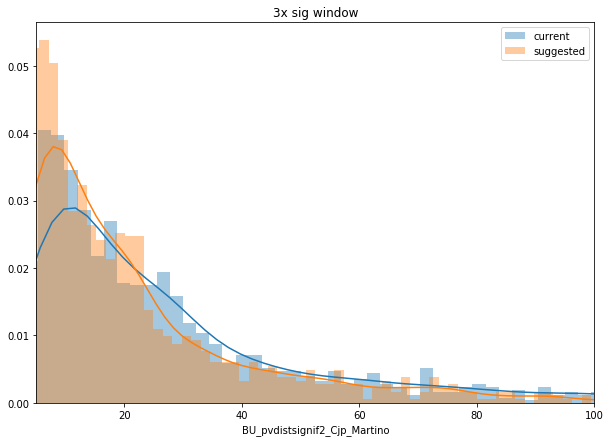

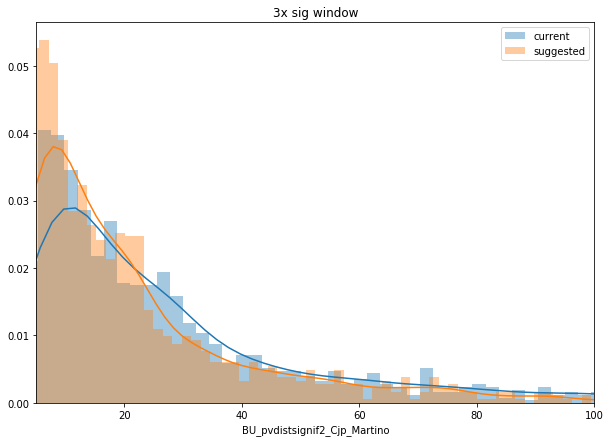

In [8]:
fig = plt.figure(figsize=(10,7))
sns.distplot(data_sig_window.BU_pvdistsignif2_Cjp, label='current', bins=100)
sns.distplot(data_sig_window.BU_pvdistsignif2_Cjp_Martino, label='suggested', bins=100)
# sns.distplot(data_sig_window.BU_pvdistsignif2_Cjp_mine, label = 'mine', bins=100)
plt.legend()

plt.xlim(5, 100)
plt.title('3x sig window')
plt.show()

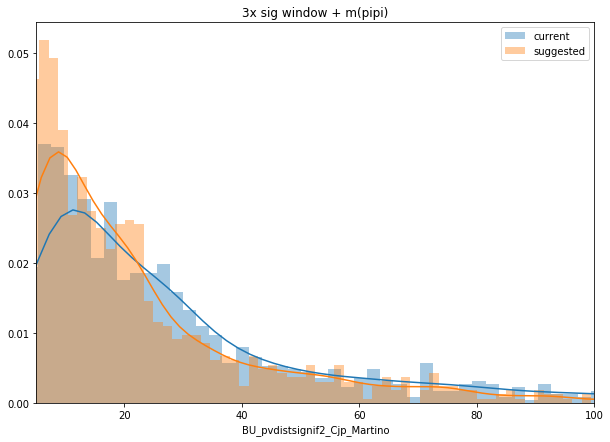

In [12]:
fig = plt.figure(figsize=(10,7))
sns.distplot(data_sig_pipi_window.BU_pvdistsignif2_Cjp, label='current', bins=100)
sns.distplot(data_sig_pipi_window.BU_pvdistsignif2_Cjp_Martino, label='suggested', bins=100)
# sns.distplot(data_sig_pipi_window.BU_pvdistsignif2_Cjp_mine, label = 'mine', bins=100)
plt.legend()

plt.xlim(5, 100)
plt.title('3x sig window + m(pipi)')
plt.show()
fig.savefig('DSs.png')

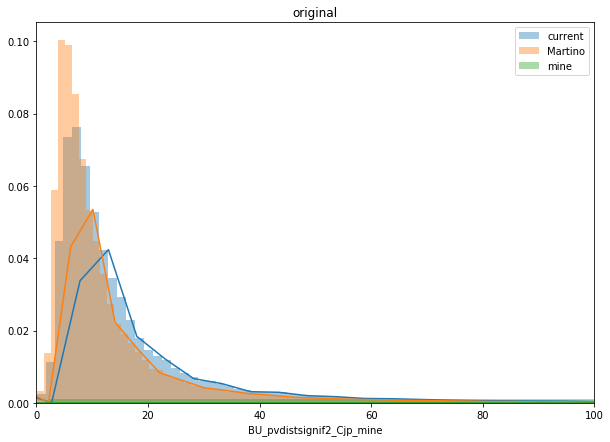

In [20]:
fig = plt.figure(figsize=(10,7))

sns.distplot(data.BU_pvdistsignif2_Cjp, label='current', bins=400)
sns.distplot(data.BU_pvdistsignif2_Cjp_Martino, label='Martino', bins=400)
sns.distplot(data.BU_pvdistsignif2_Cjp_mine, label = 'mine', bins=400)
plt.legend()

plt.xlim(0, 100)
plt.title('original')
plt.show()

In [21]:
print('sig, current > 5 :', sum(data_sig_window.BU_pvdistsignif2_Cjp > 5))
print('sig, Martino > 5 :', sum(data_sig_window.BU_pvdistsignif2_Cjp_Martino > 5))
print('no sig window, current > 5 :', sum(data.BU_pvdistsignif2_Cjp > 5))
print('no sig window, Martino > 5 :', sum(data.BU_pvdistsignif2_Cjp_Martino > 5))

sig, current > 5 : 1076
sig, Martino > 5 : 1007
no sig window, current > 5 : 183340
no sig window, Martino > 5 : 160340


In [22]:
print('sig+pipi, current > 5 :', sum(data_sig_pipi_window.BU_pvdistsignif2_Cjp > 5))
print('sig+pipi, Martino > 5 :', sum(data_sig_pipi_window.BU_pvdistsignif2_Cjp_Martino > 5))

sig+pipi, current > 5 : 973
sig+pipi, Martino > 5 : 920


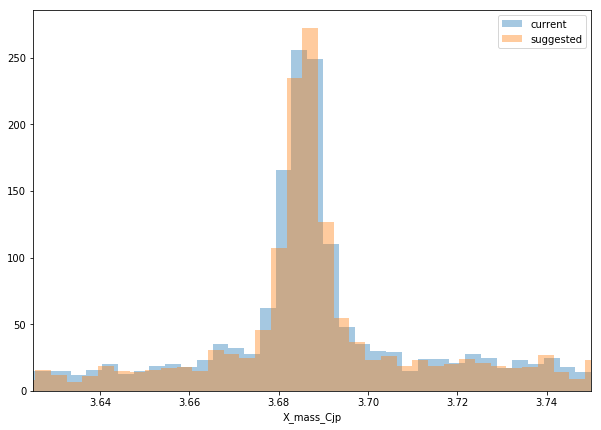

In [9]:
fig = plt.figure(figsize=(10,7))

sns.distplot(data_sig_wo_psi_pipi_window[data_sig_wo_psi_pipi_window.BU_pvdistsignif2_Cjp > 5].X_mass_Cjp, label='current', bins=200, kde=False)
sns.distplot(data_sig_wo_psi_pipi_window[data_sig_wo_psi_pipi_window.BU_pvdistsignif2_Cjp_Martino > 5].X_mass_Cjp, label='suggested', bins=200, kde=False)
plt.legend()
plt.xlim((3.625, 3.75))

plt.show()
fig.savefig('psi_mass_DS.png')

### **Fit them**

In [24]:
import probfit
import iminuit

In [42]:
data_all = data_sig_wo_psi_pipi_window[data_sig_wo_psi_pipi_window.BU_pvdistsignif2_Cjp_Martino > 5]
data_all = data_all[(data_all.X_mass_Cjp > 3.64) & (data_all.X_mass_Cjp < 3.74)]
data_all = data_all.X_mass_Cjp.values

In [43]:
# Using a polynomial to fit a distribution is problematic, because the
# polynomial can assume negative values, which results in NaN (not a number)
# values in the likelihood function.
# To avoid this problem we restrict the fit to the range (0, 5) where
# the polynomial is clearly positive.
fit_range = (3.64, 3.74)
normalized_poly = probfit.Normalized(probfit.Polynomial(2), fit_range)
normalized_poly = probfit.Extended(normalized_poly, extname='NBkg')

gauss1 = probfit.Extended(probfit.rename(probfit.gaussian, ['x', 'mu', 'sigma1']))
gauss2 = probfit.Extended(probfit.rename(probfit.gaussian, ['x', 'mu', 'sigma2'])) #, extname='N2'
sum_gauss = probfit.AddPdfNorm(gauss1, gauss2)
# Define an extended PDF consisting of three components
pdf = probfit.AddPdf(normalized_poly, gauss1)

print('normalized_poly: {}'.format(probfit.describe(normalized_poly)))
print('gauss1:          {}'.format(probfit.describe(gauss1)))
# print('gauss2:          {}'.format(probfit.describe(gauss2)))
print('pdf:             {}'.format(probfit.describe(pdf)))

normalized_poly: ['x', 'c_0', 'c_1', 'c_2', 'NBkg']
gauss1:          ['x', 'mu', 'sigma1', 'N']
pdf:             ['x', 'c_0', 'c_1', 'c_2', 'NBkg', 'mu', 'sigma1', 'N']


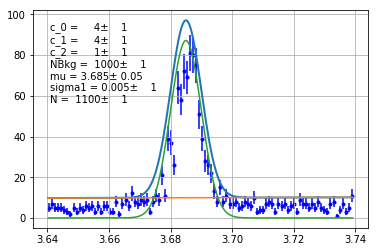

In [44]:
unbinned_likelihood = probfit.UnbinnedLH(pdf, data_all, extended=True, extended_bound=fit_range)
pars = dict(mu=3.685, error_mu=0.05, sigma1=0.005, N=1100,
#                                    sigma2=0.005, f_0=0.5,
            c_0=4, c_1=4, c_2=1,  NBkg=1000)
minuit = iminuit.Minuit(unbinned_likelihood, pedantic=False, print_level=0, **pars)
# You can see that the model already roughly matches the data
unbinned_likelihood.draw(minuit, parts=True);

In [45]:
minuit.migrad()

/home/yaourt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SmallIntegralWarning: (3.684153631529378, -29.61711837860961, 4.0, 1.0)
  """Entry point for launching an IPython kernel.


({'fval': -11893.17479162517,
  'edm': 2.0119400451728643e-05,
  'nfcn': 241,
  'up': 0.5,
  'is_valid': True,
  'has_valid_parameters': True,
  'has_accurate_covar': True,
  'has_posdef_covar': True,
  'has_made_posdef_covar': False,
  'hesse_failed': False,
  'has_covariance': True,
  'is_above_max_edm': False,
  'has_reached_call_limit': False},
 [{'number': 0,
   'name': 'c_0',
   'value': -17.82856780619155,
   'error': 11.111467894879063,
   'is_const': False,
   'is_fixed': False,
   'has_limits': False,
   'has_lower_limit': False,
   'has_upper_limit': False,
   'lower_limit': None,
   'upper_limit': None},
  {'number': 1,
   'name': 'c_1',
   'value': 3.0134458383044094,
   'error': 3.6341083078373284,
   'is_const': False,
   'is_fixed': False,
   'has_limits': False,
   'has_lower_limit': False,
   'has_upper_limit': False,
   'lower_limit': None,
   'upper_limit': None},
  {'number': 2,
   'name': 'c_2',
   'value': 1.0579889189078202,
   'error': 1.2335859355305134,
   'i

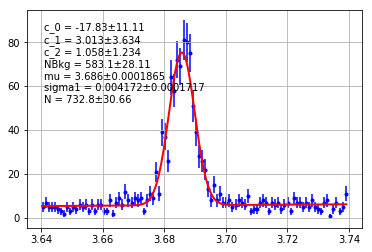

FCN = -11893.17479162517 
 TOTAL NCALL = 241 
 NCALLS = 241 
 
 
 EDM = 2.0119400451728643e-05 
 GOAL EDM = 5e-06 
 
 UP = 0.5 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,c_0,-17.8286,11.1115,,,,,No
1,c_1,3.01345,3.63411,,,,,No
2,c_2,1.05799,1.23359,,,,,No
3,NBkg,583.125,28.1134,,,,,No
4,mu,3.68571,0.000186453,,,,,No
5,sigma1,0.004172,0.00017171,,,,,No
6,N,732.837,30.6616,,,,,No


+,c_0,c_1,c_2,NBkg,mu,sigma1,N
c_0,1.00,-0.44,-0.35,0.01,0.02,-0.01,-0.01
c_1,-0.44,1.00,-0.30,0.01,0.02,-0.01,-0.01
c_2,-0.35,-0.30,1.00,0.01,0.02,-0.01,-0.01
NBkg,0.01,0.01,0.01,1.00,-0.01,-0.27,-0.24
mu,0.02,0.02,0.02,-0.01,1.00,0.03,0.01
sigma1,-0.01,-0.01,-0.01,-0.27,0.03,1.00,0.25
N,-0.01,-0.01,-0.01,-0.24,0.01,0.25,1.00


In [46]:
unbinned_likelihood.show(minuit, parts=False);
minuit.print_fmin()
minuit.print_matrix()

### **Multiple candidates**

In [103]:
print(f'num candidates = {data_sig_window.shape[0]}, num events = {sum(data_sig_window.nB_id)}')

num candidates = 1125, num events = 716.0


In [99]:
sum(data.SAMEEVENT), sum(data.nB_id - 1)

(132069.0, -137909.0)

In [96]:
data.SAMEEVENT[:10]

0    1.0
1    0.0
2    0.0
3    1.0
4    1.0
5    1.0
6    1.0
7    1.0
8    1.0
9    1.0
Name: SAMEEVENT, dtype: float64

In [97]:
data.nB_id[:10]

0    1.0
1    1.0
2    1.0
3    0.0
4    0.0
5    0.0
6    0.0
7    0.0
8    0.0
9    0.0
Name: nB_id, dtype: float64

In [98]:
data.shape

(204391, 44)

#### **from MySel output on data**

In [19]:
# psi window w/o DS cuts
print(1127/1054)

# psi window w DS cuts
print(1078/1009)

1.069259962049336
1.068384539147671


In [106]:
# X window w/ DS cuts
554 / 501

1.1057884231536925

In [66]:
# psi, Bs sidebands + all windows w/ DS cuts
# if (ch.B_mass[ibs] > 5.27 and ch.B_mass[ibs] < 5.47) or (ch.B_mass[ibs] > 5.5) or (ch.B_mass[ibs] < 5.24)

371 / 354

1.0480225988700564

In [67]:
# X, Bs sidebands + all windows w/ DS cuts
# if (ch.B_mass[ibs] > 5.27 and ch.B_mass[ibs] < 5.47) or (ch.B_mass[ibs] > 5.5) or (ch.B_mass[ibs] < 5.24)

536 / 493

1.0872210953346857

#### **from MySel output on MC**

In [70]:
# psi w/o matching
29442 / 28583

1.0300528286044153

In [76]:
# X w/o matching
41343 / 40021

1.0330326578546263

In [77]:
# X w/ matching
41343 / 40021

1.011061946902655

In [6]:
data.to_pickle('data_B0_e3de87_nB_4000.pkl')
MC.to_pickle('MC_pair_dR_psi_renamed.pkl')

#### **Matching studies**

In [45]:
variables = ( [
'dR_mup','dR_mum', 'dR_pip', 'dR_pim', 'dR_Kp', 'dR_Km',
'PIPI_mass_Cjp', 'PHI_mass_Cjp', 'BU_mass_Cjp', 'BU_pvdistsignif2_Cjp', 'X_mass_Cjp'
] ) 

variables_prev = ( [
'dR_mu1','dR_mu2', 'dR_pi1', 'dR_pi2', 'dR_K1', 'dR_K2',
'dR_mu1_vv','dR_mu2_vv', 'dR_pi1_vv', 'dR_pi2_vv', 'dR_K1_vv', 'dR_K2_vv',
    
'PIPI_mass_Cjp', 'PHI_mass_Cjp', 'BU_mass_Cjp', 'BU_pvdistsignif2_Cjp', 'X_mass_Cjp'
] ) 

data = read_root('/home/yaourt/Study/Bs_resonances/psi_smatch_v2_fc33ffd.root', columns = variables)
# psi_smatch_v2_fc33ffd
# X_smatch_v2_dede235
data = data.dropna()

data_prev = read_root('/home/yaourt/Study/Bs_resonances/BsToPsiPhi_Smatch_v1_pair_dR_phi_genmass.root', columns = variables_prev)
# BsToPsiPhi_Smatch_v1_pair_dR_phi_genmass
# BsToXPhi_Smatch_v1_pair_dR_phi_genmass
data_prev = data_prev.dropna()

In [35]:
data.shape

(127224, 11)

In [38]:
data[(data.BU_mass_Cjp > 5.3669 - 0.035) & (data.BU_mass_Cjp < 5.3669 + 0.035) & (data.PHI_mass_Cjp > 1.0195 - 0.016) & (data.PHI_mass_Cjp < 1.0195 + 0.016) & 
    (data.X_mass_Cjp > 3.872 - 0.025) & (data.X_mass_Cjp < 3.872 + 0.025)].shape

(45391, 11)

In [46]:
k1  = pd.concat([data_prev.dR_K1,  data_prev.dR_K1_vv],  axis=1).min(axis=1) 
k2  = pd.concat([data_prev.dR_K2,  data_prev.dR_K2_vv],  axis=1).min(axis=1) 
pi1 = pd.concat([data_prev.dR_pi1, data_prev.dR_pi1_vv], axis=1).min(axis=1) 
pi2 = pd.concat([data_prev.dR_pi2, data_prev.dR_pi2_vv], axis=1).min(axis=1) 
mu1 = pd.concat([data_prev.dR_mu1, data_prev.dR_mu1_vv], axis=1).min(axis=1) 
mu2 = pd.concat([data_prev.dR_mu2, data_prev.dR_mu2_vv], axis=1).min(axis=1) 

In [47]:
cut = 0.05
dR_mask = (data.dR_Km < cut) & (data.dR_Kp < cut) & (data.dR_pim < cut) & (data.dR_pip < cut) & (data.dR_mup < cut) & (data.dR_mum < cut)
dR_mask_prev = ((k1 < cut) & (k2 < cut) & (pi1 < cut) & (pi2 < cut) & (mu1 < cut) & (mu2 < cut))

In [48]:


X_mask   = (data.X_mass_Cjp > 3.686 - 0.025)   & (data.X_mass_Cjp < 3.686 + 0.025)  # 3.686 + 0.025 /// 3.872 - 0.025
phi_mask = (data.PHI_mass_Cjp > 1.0195 - 0.016) & (data.PHI_mass_Cjp < 1.0195 + 0.016) 
B_mask   = (data.BU_mass_Cjp > 5.3669 - 0.035)  & (data.BU_mass_Cjp < 5.3669 + 0.035)
mpipi_mask = (data.PIPI_mass_Cjp > 0.4) & (data.PIPI_mass_Cjp < 0.6)  # 0.4, 0.6 /// 0.65, 0.78

X_mask_prev   = (data_prev.X_mass_Cjp > 3.686 - 0.025)   & (data_prev.X_mass_Cjp < 3.686 + 0.025)
phi_mask_prev = (data_prev.PHI_mass_Cjp > 1.0195 - 0.016) & (data_prev.PHI_mass_Cjp < 1.0195 + 0.016) 
B_mask_prev   = (data_prev.BU_mass_Cjp > 5.3669 - 0.035)  & (data_prev.BU_mass_Cjp < 5.3669 + 0.035)
mpipi_mask_prev = (data_prev.PIPI_mass_Cjp > 0.4) & (data_prev.PIPI_mass_Cjp < 0.6)
# current_BsDS_mask  = data.BU_pvdistsignif2_Cjp > 5
# current_jpsiDS_mask = data.JPSI_pvdistsignif2_Cmumu > 3

# data_sig_window = data[X_mask & phi_mask & B_mask]
# data_sig_pipi_window = data[dR_mask & X_mask & phi_mask & B_mask & mpipi_mask]

# data_prev_sig_window = data_prev[X_mask_prev & phi_mask_prev & B_mask_prev]
# data_prev_sig_pipi_window = data_prev[dR_mask_prev & X_mask_prev & phi_mask_prev & B_mask_prev & mpipi_mask_prev]

# data_sig_wo_psi_window = data[phi_mask & B_mask]
# data_sig_wo_psi_pipi_window = data[phi_mask & B_mask & mpipi_mask]

# data_sig_current_DS = data[X_mask & phi_mask & B_mask & mpipi_mask & current_BsDS_mask & current_jpsiDS_mask]

In [49]:
data[dR_mask & X_mask & phi_mask & B_mask & mpipi_mask].shape, data.shape

((82229, 11), (230091, 11))

In [30]:
data_prev[dR_mask_prev & X_mask_prev & phi_mask_prev & B_mask_prev & mpipi_mask_prev].shape, data_prev.shape

((33778, 17), (127224, 17))

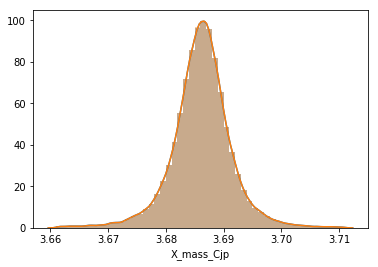

In [12]:
sns.distplot(data[dR_mask & X_mask & phi_mask & B_mask & mpipi_mask].X_mass_Cjp)
sns.distplot(data_prev[dR_mask_prev & X_mask_prev & phi_mask_prev & B_mask_prev & mpipi_mask_prev].X_mass_Cjp)